In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import equilibrator_api
from equilibrator_api import ComponentContribution, Q_, ureg, Reaction
import equilibrator_pathway
from equilibrator_pathway import ThermodynamicModel

print('equlibrator_api version:', equilibrator_api.__version__)
print('equlibrator_pathway version:', equilibrator_pathway.__version__)

import warnings
warnings.filterwarnings('ignore')

ureg.default_format = ".2f~P"
plt.rc('axes', axisbelow=True)
ureg.setup_matplotlib(True)

comp_contrib = ComponentContribution()

equlibrator_api version: 0.4.7
equlibrator_pathway version: 0.4.7


In [2]:
comp_contrib.p_h = Q_(7)
comp_contrib.ionic_strength = Q_('250 mM')
comp_contrib.p_mg = Q_(3)

In [3]:
def MDF(psw):
    print(psw)
    model = ThermodynamicModel.from_sbtab(f"{psw}.tsv", comp_contrib=comp_contrib) 
    print('Net reaction: ', model.net_reaction_formula)

    model.update_standard_dgs()
    mdf_result = model.mdf_analysis()
    mdf = mdf_result.score
    print(f'MDF: {mdf: .2f} kJ/mol')
    display(mdf_result.reaction_df)

    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    mdf_result.plot_driving_forces(ax)
    ax.grid('on')
    # fig.savefig(f'mdf_result_{psw}.eps')
    plt.show()

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    mdf_result.plot_concentrations(ax)
    plt.show()

 ## Under default conditions

1_THF
Net reaction:  atp + for + nadph = adp + fald + nadp + pi
MDF:  10.80 kJ/mol


,reaction_id,reaction_formula,flux,original_standard_dg_prime,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,Ftl,atp + for + thf = 10fthf + adp + pi,1.00 mM/s,-2.67 kJ/mol,-5.88 kJ/mol,-5.88 kJ/mol,-10.80 kJ/mol,0.33333
1,MtCD,10fthf + nadph = h2o + mlthf + nadp,1.00 mM/s,-4.07 kJ/mol,-4.84 kJ/mol,-4.84 kJ/mol,-10.80 kJ/mol,0.33333
2,ThfS,h2o + mlthf = fald + thf,1.00 mM/s,25.36 kJ/mol,23.97 kJ/mol,6.86 kJ/mol,-10.80 kJ/mol,0.33333


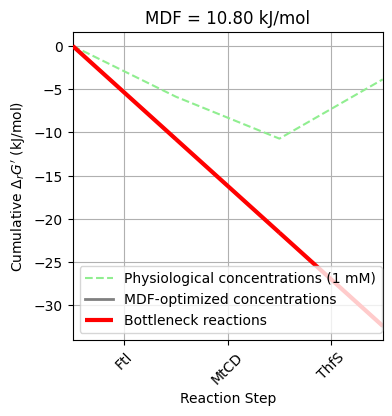

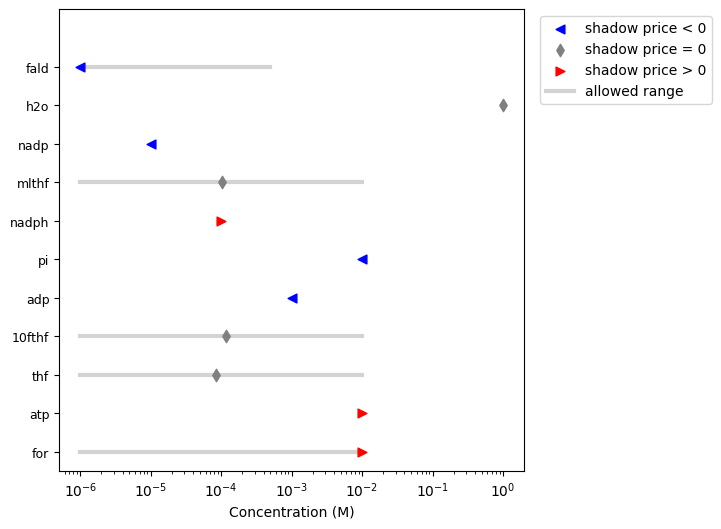

1_THF_NADH
Net reaction:  atp + for + nadh = adp + fald + nad + pi
MDF:  7.05 kJ/mol


,reaction_id,reaction_formula,flux,original_standard_dg_prime,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,Ftl,atp + for + thf = 10fthf + adp + pi,1.00 mM/s,-2.67 kJ/mol,-5.91 kJ/mol,-5.91 kJ/mol,-7.05 kJ/mol,0.33333
1,MtCD,10fthf + nadh = h2o + mlthf + nad,1.00 mM/s,-4.21 kJ/mol,-4.98 kJ/mol,-4.98 kJ/mol,-7.05 kJ/mol,0.33333
2,ThfS,h2o + mlthf = fald + thf,1.00 mM/s,25.36 kJ/mol,23.99 kJ/mol,6.87 kJ/mol,-7.05 kJ/mol,0.33333


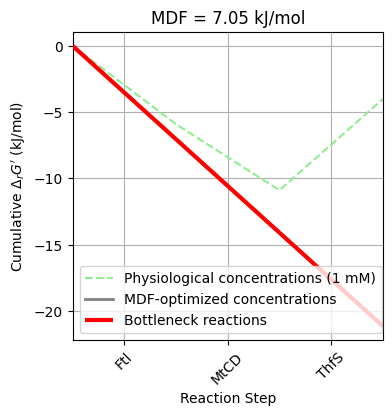

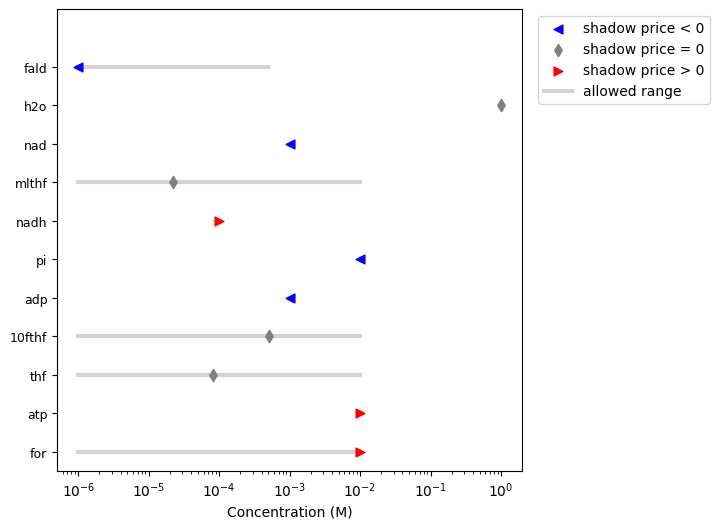

2_CoA
Net reaction:  atp + for + nadh = amp + fald + nad + ppi
MDF:  9.16 kJ/mol


,reaction_id,reaction_formula,flux,original_standard_dg_prime,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,FCS,atp + coa + for = amp + forcoa + ppi,1.00 mM/s,-30.95 kJ/mol,-17.60 kJ/mol,-17.60 kJ/mol,-13.93 kJ/mol,0.0
1,FCR,forcoa + nadh = coa + fald + nad,1.00 mM/s,39.28 kJ/mol,25.06 kJ/mol,7.95 kJ/mol,-9.16 kJ/mol,1.0


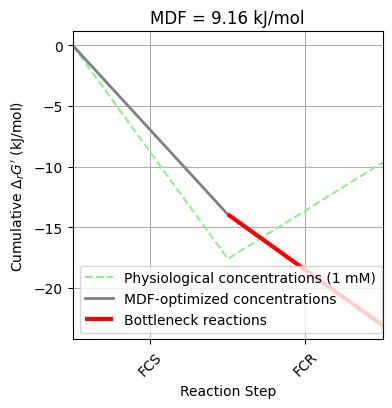

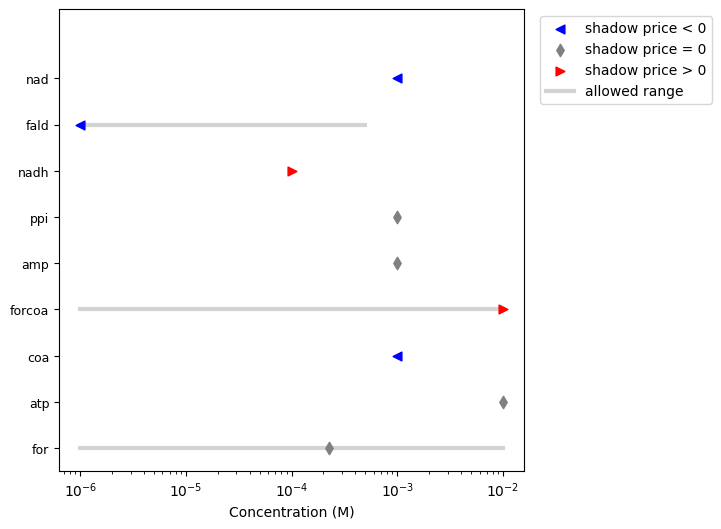

2_CoA_NADPH
Net reaction:  atp + for + nadph = amp + fald + nadp + ppi
MDF:  20.44 kJ/mol


,reaction_id,reaction_formula,flux,original_standard_dg_prime,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,Acs,atp + coa + for = amp + forcoa + ppi,1.00 mM/s,-30.95 kJ/mol,-17.59 kJ/mol,-17.59 kJ/mol,-21.18 kJ/mol,0.0
1,Acr,forcoa + nadph = coa + fald + nadp,1.00 mM/s,39.41 kJ/mol,25.20 kJ/mol,8.09 kJ/mol,-20.44 kJ/mol,1.0


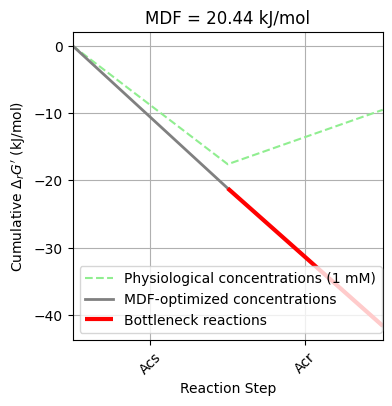

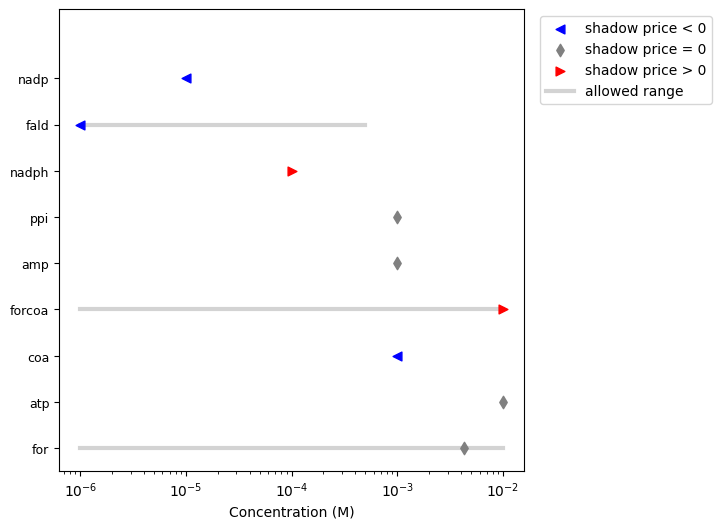

3_Pi
Net reaction:  atp + for + nadph = adp + fald + nadp + pi
MDF:  15.50 kJ/mol


,reaction_id,reaction_formula,flux,original_standard_dg_prime,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,FPK,atp + for = adp + forp,1.00 mM/s,-15.43 kJ/mol,-9.79 kJ/mol,-9.79 kJ/mol,-15.50 kJ/mol,0.44605
1,FPR,forp + nadph = fald + nadp + pi,1.00 mM/s,34.04 kJ/mol,24.44 kJ/mol,7.32 kJ/mol,-15.50 kJ/mol,0.55395


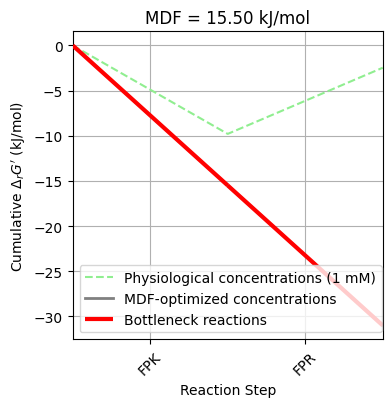

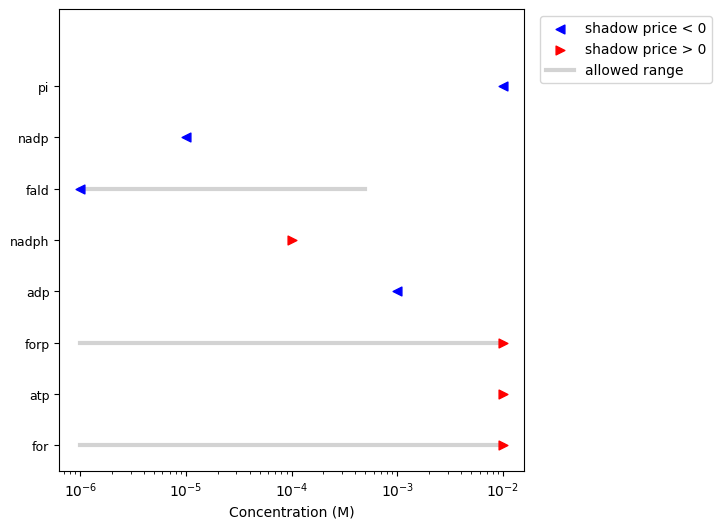

3_Pi_NADH
Net reaction:  atp + for + nadh = adp + fald + nad + pi
MDF:  8.63 kJ/mol


,reaction_id,reaction_formula,flux,original_standard_dg_prime,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,FPK,atp + for = adp + forp,1.00 mM/s,-15.43 kJ/mol,-2.92 kJ/mol,-2.92 kJ/mol,-8.63 kJ/mol,0.23551
1,FPR,forp + nadh = fald + nad + pi,1.00 mM/s,33.91 kJ/mol,19.90 kJ/mol,2.78 kJ/mol,-8.63 kJ/mol,0.76449


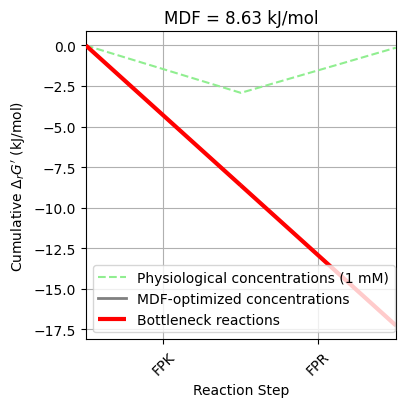

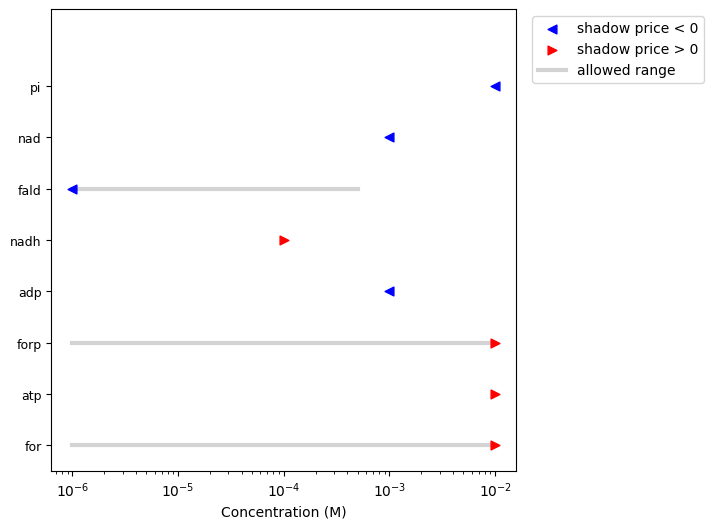

In [4]:
psws = ['1_THF', '1_THF_NADH', '2_CoA', '2_CoA_NADPH', '3_Pi', '3_Pi_NADH']

for psw in psws: 
    MDF(psw)

In [5]:
def loadModel(psw):
    print(psw)
    model = ThermodynamicModel.from_sbtab(f"{psw}.tsv", comp_contrib=comp_contrib) 
    print('Net reaction: ', model.net_reaction_formula)
    return model

def MDF_ub(model, cmp, ub):
    model.set_bounds(cid=cmp, ub=Q_(ub, ureg.mM))
    model.update_standard_dgs()
    mdf_result = model.mdf_analysis()
    return mdf_result.score

def MDF_lb(model, cmp, lb):
    model.set_bounds(cid=cmp, lb=Q_(lb, ureg.mM))
    model.update_standard_dgs()
    mdf_result = model.mdf_analysis()
    return mdf_result.score

 ## Formate upper bound between 1 and 50 mM

In [6]:
mdf_for = pd.DataFrame()
mdf_for['for_ub'] = range(1,51)
for psw in psws:
    model = loadModel(psw)
    for i in mdf_for.index: 
        mdf_for.loc[i,psw]=MDF_ub(model, 'for', mdf_for['for_ub'][i])

1_THF
Net reaction:  atp + for + nadph = adp + fald + nadp + pi
1_THF_NADH
Net reaction:  atp + for + nadh = adp + fald + nad + pi
2_CoA
Net reaction:  atp + for + nadh = amp + fald + nad + ppi
2_CoA_NADPH
Net reaction:  atp + for + nadph = amp + fald + nadp + ppi
3_Pi
Net reaction:  atp + for + nadph = adp + fald + nadp + pi
3_Pi_NADH
Net reaction:  atp + for + nadh = adp + fald + nad + pi


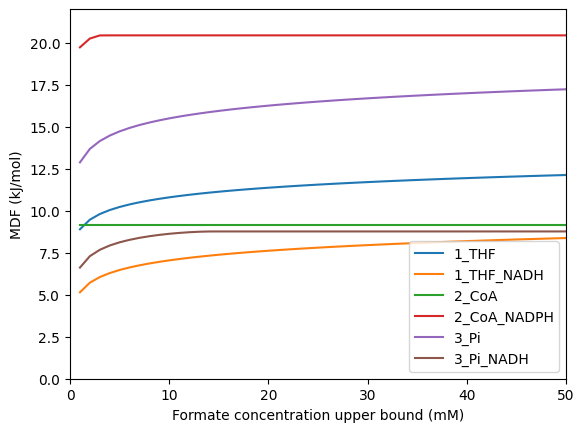

In [7]:
fig, ax = plt.subplots()
mdf_for.plot(x='for_ub', ax=ax)
plt.setp(
    ax, ylabel='MDF (kJ/mol)', ylim=(0, 22),
    xlim=(0, 50), xlabel='Formate concentration upper bound (mM)'
)
plt.savefig('formate_reduction_mdf.eps')